In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 

from sklearn.preprocessing import LabelEncoder, StandardScaler



from sklearn.feature_selection import SelectKBest  # Class to select features based on univariate statistical tests
from sklearn.feature_selection import f_classif    # ANOVA F-value test for classification tasks

In [4]:
# Load the dataset
df = pd.read_csv('../datasets/processed_data/features_30_sec.csv')
df = df.drop(labels='filename', axis=1)

df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   1000 non-null   int64  
 1   chroma_stft_mean         1000 non-null   float64
 2   chroma_stft_var          1000 non-null   float64
 3   rms_mean                 1000 non-null   float64
 4   rms_var                  1000 non-null   float64
 5   spectral_centroid_mean   1000 non-null   float64
 6   spectral_centroid_var    1000 non-null   float64
 7   spectral_bandwidth_mean  1000 non-null   float64
 8   spectral_bandwidth_var   1000 non-null   float64
 9   rolloff_mean             1000 non-null   float64
 10  rolloff_var              1000 non-null   float64
 11  zero_crossing_rate_mean  1000 non-null   float64
 12  zero_crossing_rate_var   1000 non-null   float64
 13  harmony_mean             1000 non-null   float64
 14  harmony_var              

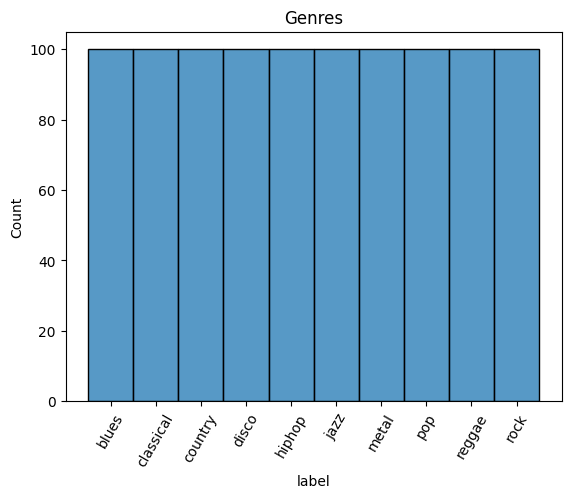

In [13]:
ax = sns.histplot(df["label"])
_ = plt.xticks(rotation = 60)
_ = plt.title("Genres") 

In [5]:
# Encode class labels
class_list = df.iloc[:, -1]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(class_list)

In [6]:
# Standardize feature data
X = StandardScaler().fit_transform(np.array(df.iloc[:, :-1], dtype=float))

In [17]:
# Convert the standardized features array back to a DataFrame
X_df = pd.DataFrame(X, columns=df.columns[:-1])  # Use the original feature names for columns
# Add the encoded labels as a new column to this DataFrame
X_df['label'] = y

In [19]:
correlation = X_df.corr()

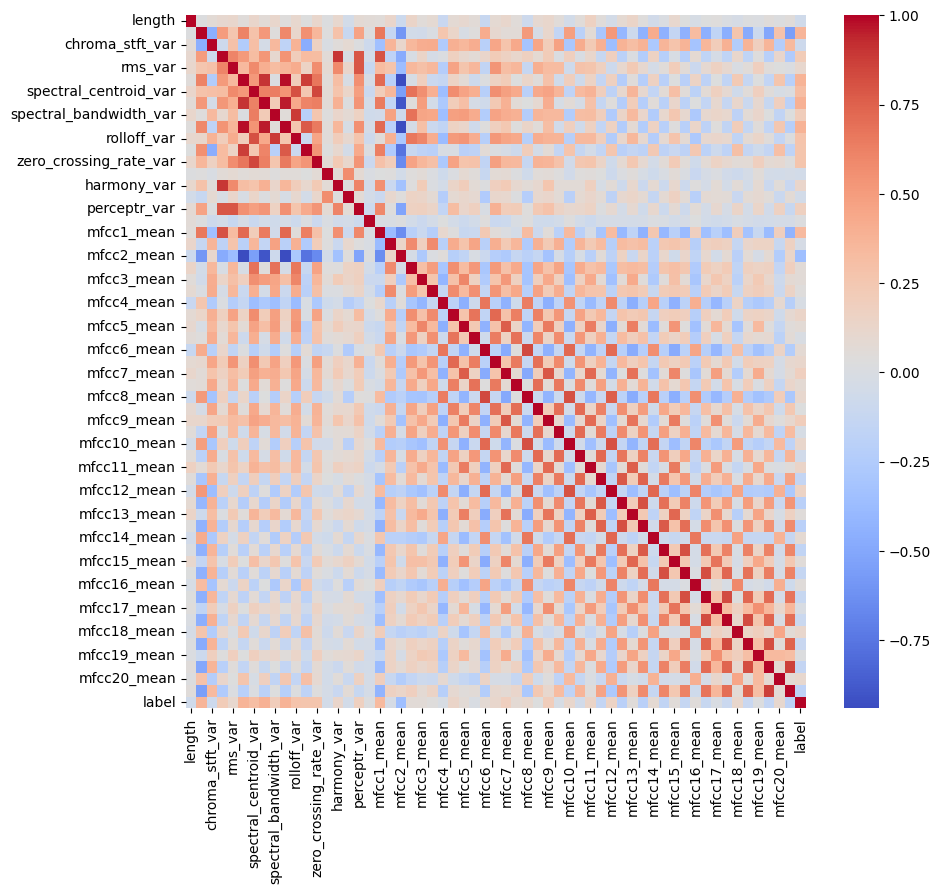

In [24]:
plt.figure(figsize = (10,9))
sns.heatmap(correlation, cmap = 'coolwarm', annot = False)
plt.show()

In [23]:
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

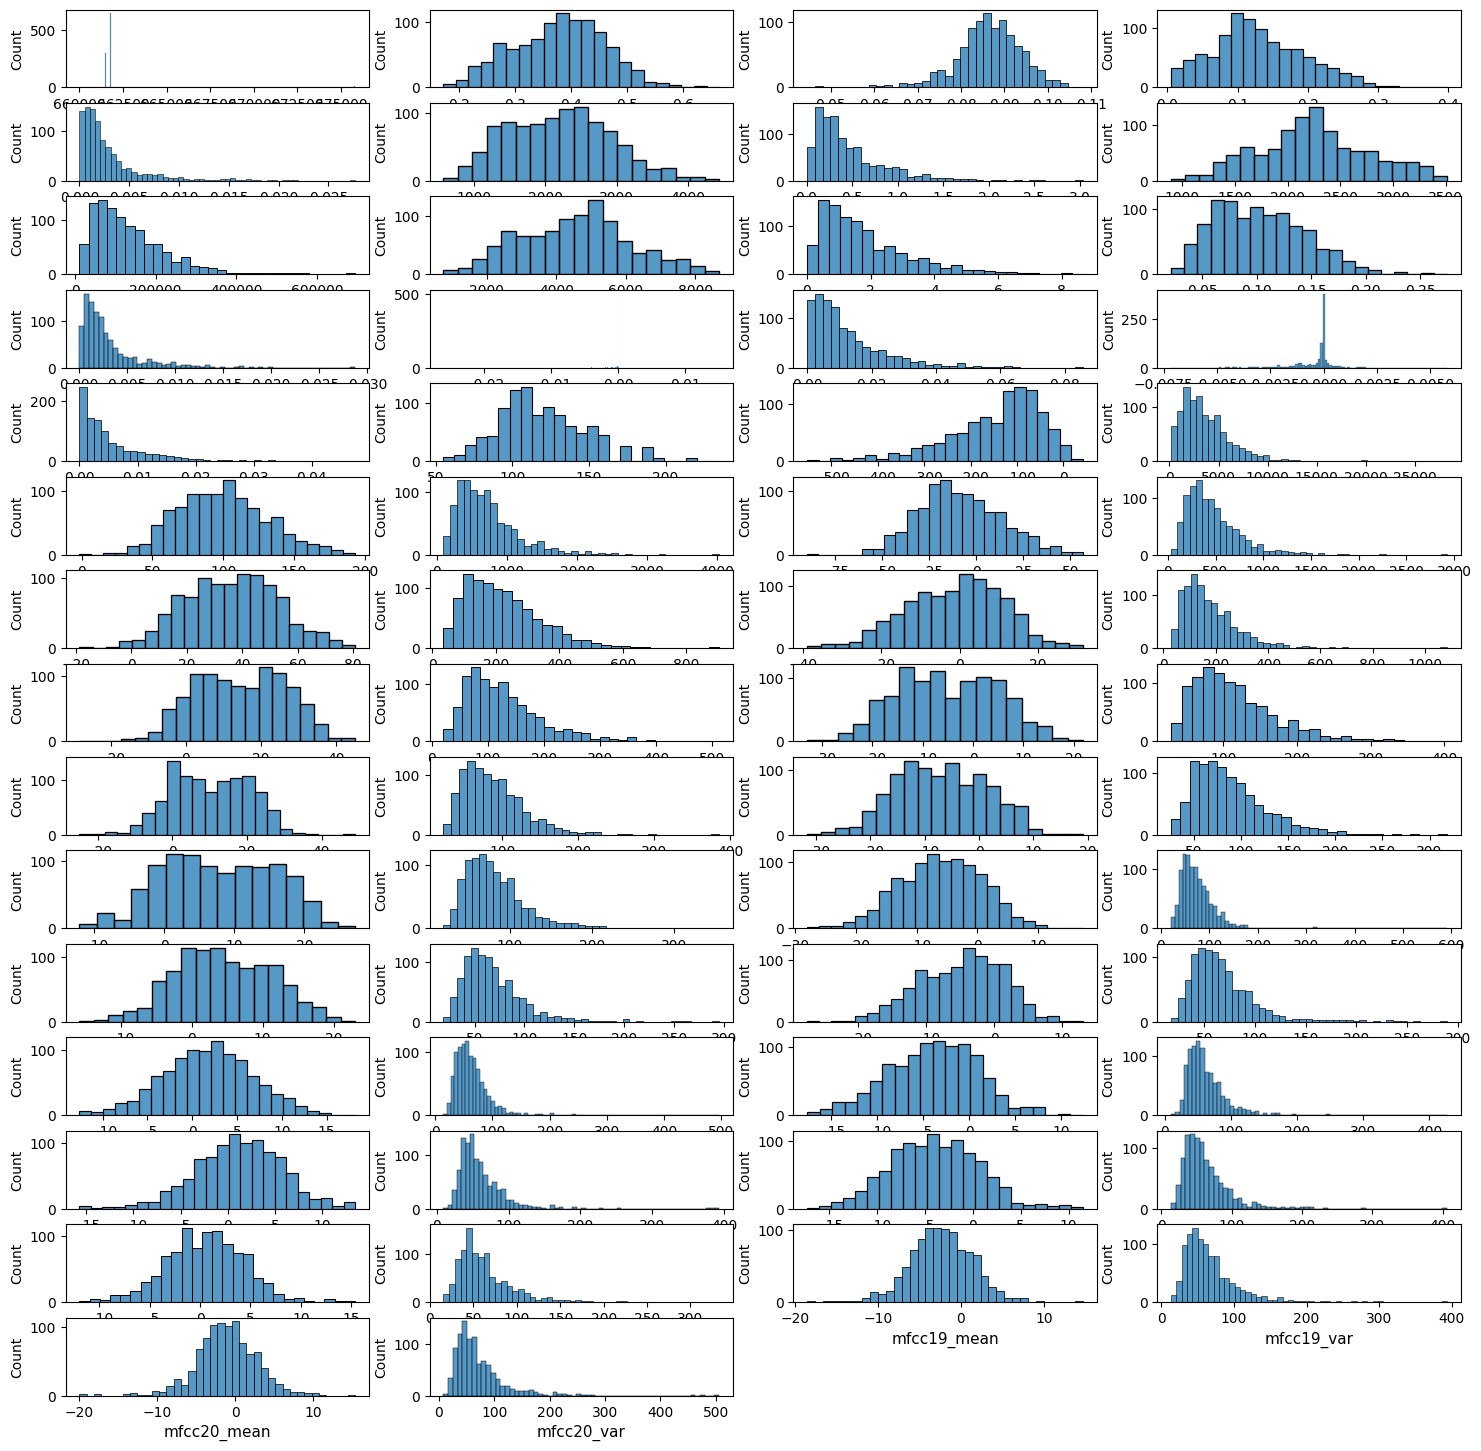

In [33]:
k = 0
X_feature = df.iloc[:,:-1]
plt.figure(figsize = (18,18))

# Calculate the number of rows and columns required
n_features = X_feature.shape[1]
cols = 4  # You can keep the number of columns as 4 or adjust as needed
rows = math.ceil(n_features / cols)

for i in X_feature:
    plt.subplot(rows,cols, k+1)
    sns.histplot(X_feature[i])
    plt.xlabel(i, fontsize = 11)
    k +=1

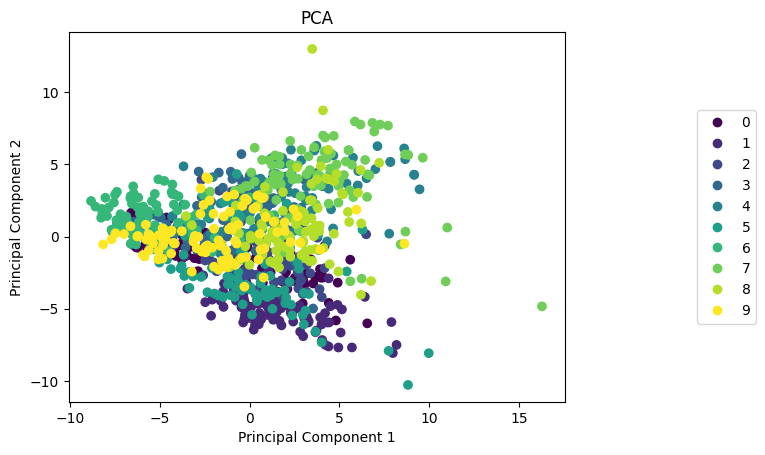

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X,y)
plot_pca = plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
handles, labels = plot_pca.legend_elements()
lg = plt.legend(handles, list(np.unique(y)), loc = 'center right', bbox_to_anchor= (1.4, 0.5))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
_ = plt.title("PCA")

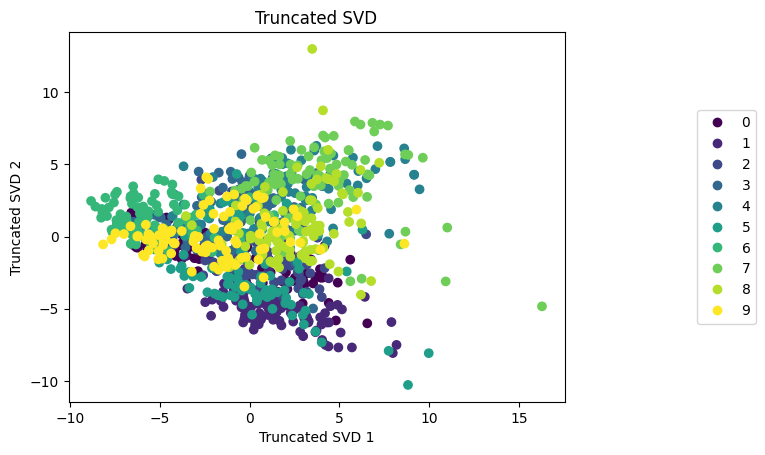

In [12]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X,y)
plot_svd = plt.scatter(X_svd[:,0], X_svd[:,1],c=y)
handles, labels = plot_svd.legend_elements()
lg = plt.legend(handles, list(np.unique(y)), loc = 'center right', bbox_to_anchor = (1.4, 0.5))
plt.xlabel("Truncated SVD 1")
plt.ylabel("Truncated SVD 2")
_ = plt.title("Truncated SVD")

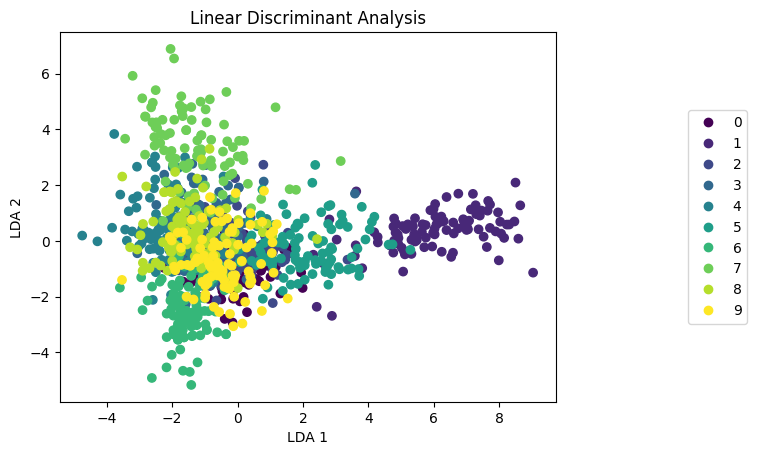

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X,y)
lda = plt.scatter(X_lda[:,0], X_lda[:,1],c=y)
handles, labels = lda.legend_elements()
lg = plt.legend(handles, list(np.unique(y)), loc = 'center right', bbox_to_anchor = (1.4, 0.5))
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
_ = plt.title("Linear Discriminant Analysis")

In [6]:
# Use the Standaridized data
# Define the number of top features you want to select
k = 15  # Number of features to select
selector = SelectKBest(f_classif, k=k)
selector.fit_transform(X, y)

# Get the selected feature names
selected_features = df.iloc[:, :-1].columns[selector.get_support()]
print(selected_features)

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_var',
       'perceptr_var', 'mfcc1_mean', 'mfcc2_mean', 'mfcc4_mean', 'mfcc6_mean',
       'mfcc8_mean'],
      dtype='object')


In [7]:
# Use the original data
# Define the number of top features you want to select
k = 15  # Number of features to select
selector = SelectKBest(f_classif, k=k)
selector.fit_transform(df.drop('label', axis=1), df['label'])

# Get the selected feature names
selected_features = df.iloc[:, :-1].columns[selector.get_support()]
print(selected_features)

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_var',
       'perceptr_var', 'mfcc1_mean', 'mfcc2_mean', 'mfcc4_mean', 'mfcc6_mean',
       'mfcc8_mean'],
      dtype='object')


In [10]:
# Find the 10 most important features for the RandomForestClassifier

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(df.drop('label', axis=1), df['label'])

# Print the selected features
selected_features = df.drop('label', axis=1).columns[fit.support_]
print(selected_features)

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_var', 'spectral_bandwidth_mean', 'perceptr_var',
       'mfcc4_mean', 'mfcc5_var', 'mfcc9_mean'],
      dtype='object')


In [8]:
# Find the features with the greatest correlations with any other features
# Find the features with the greatest correlations with the 'label'
# Calculate the correlation matrix
df['label']=y
# type(df_modified)
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(to_drop)

# Extract correlations with the last column (i.e., 'label' column)
correlations_with_last_column = corr_matrix['label']
# Sort the correlations in descending order while excluding the last column itself
sorted_correlations = correlations_with_last_column.drop('label').sort_values(ascending=False)

# Get the sorted column names
sorted_column_names = sorted_correlations.index.tolist()[:5]

print(sorted_column_names)

['spectral_bandwidth_mean', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'harmony_var', 'mfcc2_mean', 'mfcc20_var']
['spectral_bandwidth_mean', 'rolloff_mean', 'spectral_centroid_mean', 'chroma_stft_mean', 'mfcc2_mean']


In [9]:
# corr_matrix = X_df.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Find features with correlation greater than 0.85
# to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
# print(to_drop)

# # Extract correlations with the last column (i.e., 'label' column)
# correlations_with_last_column = corr_matrix['label']
# # Sort the correlations in descending order while excluding the last column itself
# sorted_correlations = correlations_with_last_column.drop('label').sort_values(ascending=False)

# # Get the sorted column names
# sorted_column_names = sorted_correlations.index.tolist()[:6]

# print(sorted_column_names)